In [1]:
%%capture
!pip3 install --pre deepchem
!pip3 install graphviz
!pip3 install pydot

In [3]:
from tensorflow.keras.utils import plot_model

In [ ]:
%%capture
import deepchem as dc
import numpy as np
import gc

In [ ]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21()

In [6]:
train_dataset, valid_dataset, test_dataset = tox21_datasets

In [7]:
model = dc.models.RobustMultitaskClassifier(n_tasks=12,
    n_features=1024,
    layer_sizes=[1000])

In [8]:
dc.models.RobustMultitaskClassifier.__bases__

(deepchem.models.keras_model.KerasModel,)

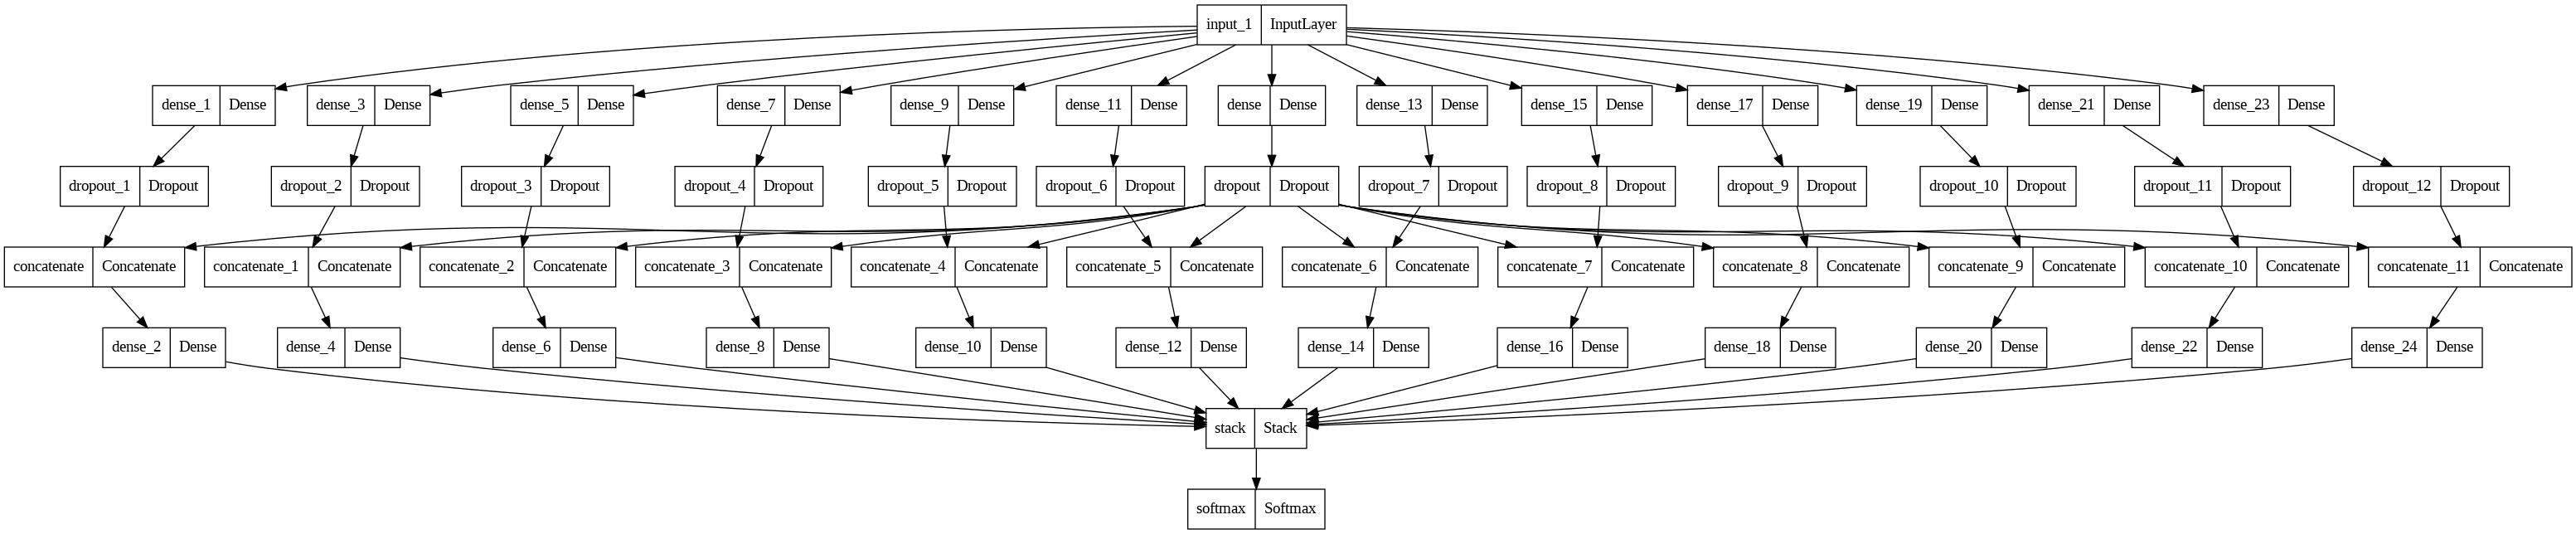

In [9]:
plot_model(model.model)

In [23]:
model.batch_size

100

In [24]:
dc.__version__

'2.7.2.dev'

In [31]:
model.fit(train_dataset, nb_epoch=5, restore=False)

0.6378505071004231

In [26]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)

In [32]:
train_scores = model.evaluate(train_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)

In [33]:
print(train_scores)
print(test_scores)

{'mean-roc_auc_score': 0.9449732385652808}
{'mean-roc_auc_score': 0.6821326512591869}
